# Check path of the images and videos before executing the cell


# Read-image

In [2]:
# read an image

import cv2
img = cv2.imread('inputs/butterfly.jpg', 1)   #Specify the correct path

cv2.imshow('image', img)
k= cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('butterfly_copy.jpg', img)
    cv2.destroyAllWindows()

# Read-View-Save A Video

In [3]:
# read, display and save a video
import cv2

cap = cv2.VideoCapture('inputs/vtest.avi')    ##Specify the correct path
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output2.avi',fourcc,20.0,(640,480))  #here 20 is FPS and (640,480) is resolution

print(cap.isOpened())

while(cap.isOpened()):
    ret, frame = cap.read()        #reading the frames from video

    if ret ==True:
        print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        out.write(frame)

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #for gray scale video

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

True
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0
768.0
576.0

# Draw Shapes

In [2]:
import numpy as np
import cv2
img = cv2.imread('butterfly.jpg',1)
img = np.zeros([512,512,4],np.uint8)
img = cv2.line(img,(0,0),(255,255),(20,100,200),10)

#cv2.arrowedLine(img,start_point,end_point,color,thikness_of_line)
img = cv2.arrowedLine(img,(0,255),(255,0),(140,30,45),5)


#cv2.rectangle(img,top_left_coordinate,bottom_right_coordinate,color,thickness)
img = cv2.rectangle(img,(10,100),(50,200),(0,0,255),-1)    #-1 for infill  and positive value for not infill.

#cv2.circle(img,center_coordinate,radius,color,thickness)
img = cv2.circle(img,(150,150),50,(0,255,0),-1)            #-1 for infill  and positive value for not infill.

font = cv2.FONT_HERSHEY_COMPLEX
line = cv2.LINE_AA


img = cv2.putText(img,'Drawing img',(10,100),font,2,(200,100,100),5,line)

cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()



# Mouse Event

In [3]:
import numpy as np
import  cv2

#events = [i for i in dir(cv2) if 'EVENT' in i]
#print(events)

def click_event(event, x, y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(x,' , ',y)  #print in console
        font = cv2.FONT_HERSHEY_SIMPLEX
        strxy = str(x)+' , '+str(y)
        cv2.putText(img,strxy,(x,y),font,1,(255,255,0),2)
        cv2.imshow('image',img) #put text on screen

    if event ==cv2.EVENT_RBUTTONDBLCLK:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]

        font =cv2.FONT_HERSHEY_SIMPLEX
        strBGR = str(blue)+' , '+str(green)+' , '+str(red)
        cv2.putText(img,strBGR,(x,y),font,0.5,(0,255,255),2)
        cv2.imshow('image',img)

#img = np.zeros((512,512,3),np.uint8)
img = cv2.imread('butterfly.jpg',1)
cv2.imshow('image',img)
cv2.setMouseCallback('image',click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

162  ,  92
132  ,  120
112  ,  90
408  ,  162
76  ,  37
370  ,  66


# Contour-Detection

In [5]:
import numpy as np
import cv2

img = cv2.imread('inputs/opencv3.png',)

#convert BGR image to grayscale(black-white) image
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)     


#ret,thresh = cv2.threshold(imgGray,start_theshold_value,start_theshold_value,0) 
ret,thresh = cv2.threshold(imgGray,127,255,0)       #both values must be between 0-255 only.


contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)   

print('number of contours='+str(len(contours)))
print(contours[0])

cv2.drawContours(img,contours,-1,(0,255,0),3)

#img = cv2.resize(img, (400, 400))
#imgGray = cv2.resize(imgGray, (400, 400))

cv2.imshow('image',img)
cv2.imshow('gray-image',imgGray)

cv2.waitKey(0)
cv2.destroyAllWindows()

number of contours=12
[[[ 91 199]]

 [[ 91 200]]

 [[ 91 201]]

 [[ 91 202]]

 [[ 91 203]]

 [[ 91 204]]

 [[ 91 205]]

 [[ 91 206]]

 [[ 91 207]]

 [[ 91 208]]

 [[ 91 209]]

 [[ 91 210]]

 [[ 91 211]]

 [[ 91 212]]

 [[ 91 213]]

 [[ 91 214]]

 [[ 91 215]]

 [[ 91 216]]

 [[ 91 217]]

 [[ 91 218]]

 [[ 91 219]]

 [[ 91 220]]

 [[ 91 221]]

 [[ 91 222]]

 [[ 91 223]]

 [[ 91 224]]

 [[ 91 225]]

 [[ 91 226]]

 [[ 91 227]]

 [[ 91 228]]

 [[ 92 228]]

 [[ 93 228]]

 [[ 94 228]]

 [[ 95 228]]

 [[ 96 228]]

 [[ 97 228]]

 [[ 98 228]]

 [[ 98 227]]

 [[ 98 226]]

 [[ 98 225]]

 [[ 98 224]]

 [[ 98 223]]

 [[ 98 222]]

 [[ 98 221]]

 [[ 98 220]]

 [[ 98 219]]

 [[ 98 218]]

 [[ 98 217]]

 [[ 98 216]]

 [[ 98 215]]

 [[ 98 214]]

 [[ 98 213]]

 [[ 98 212]]

 [[ 98 211]]

 [[ 99 210]]

 [[100 209]]

 [[101 209]]

 [[102 208]]

 [[103 208]]

 [[104 207]]

 [[105 207]]

 [[106 207]]

 [[107 208]]

 [[108 209]]

 [[108 210]]

 [[108 211]]

 [[108 212]]

 [[108 213]]

 [[108 214]]

 [[108 215]]

# Canny Edge-Detection

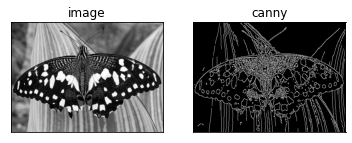

In [7]:
#edge-detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('inputs/butterfly.jpg',0)


canny = cv2.Canny(img,100,200)   #100 is smallest edge in pixel and 200 is longest edge in pixel 

titles = ['image','canny']
images = [img,canny]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Simple Thresholding- Gradient

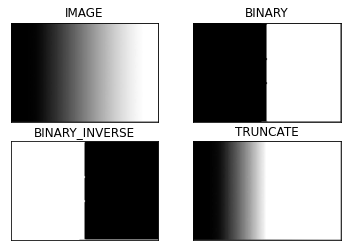

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('inputs/gradient1.jpg',0)

#cv2.threshold(grayscale_image,start_theshold_value,start_theshold_value,mode) 
#both values must be between 0-255 only.

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)


#inverse of above function
ret,th2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)



ret,th3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)


# display using opencv
#cv2.imshow("image",img)
#cv2.imshow("thresh1",th1)
#cv2.imshow("thresh2",th2)
#cv2.imshow("thresh3",th3)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#display using matplotlib

titles = ['IMAGE', 'BINARY','BINARY_INVERSE','TRUNCATE']
images = [img, th1,th2,th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Smoothing- Bluring

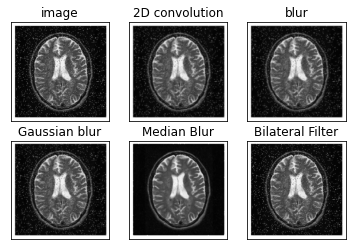

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



img = cv2.imread('inputs/noise.jpeg')
#img = cv2.imread('salt-pepper.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32) / 25   #(5,5) is size of the kernel and it should contain odd values ONLY. 
#you can change it to (3,3) or (7,7).

dst = cv2.filter2D(img, -1, kernel)

blur = cv2.blur(img,(5,5));
gblur = cv2.GaussianBlur(img,(5,5),0)

median = cv2.medianBlur(img,5)


bil = cv2.bilateralFilter(img,9,75,75)

titles = ['image', '2D convolution','blur','Gaussian blur','Median Blur','Bilateral Filter']
images = [img, dst, blur, gblur, median, bil]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()